In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import cv2
import numpy as np
import matplotlib.pyplot as plt

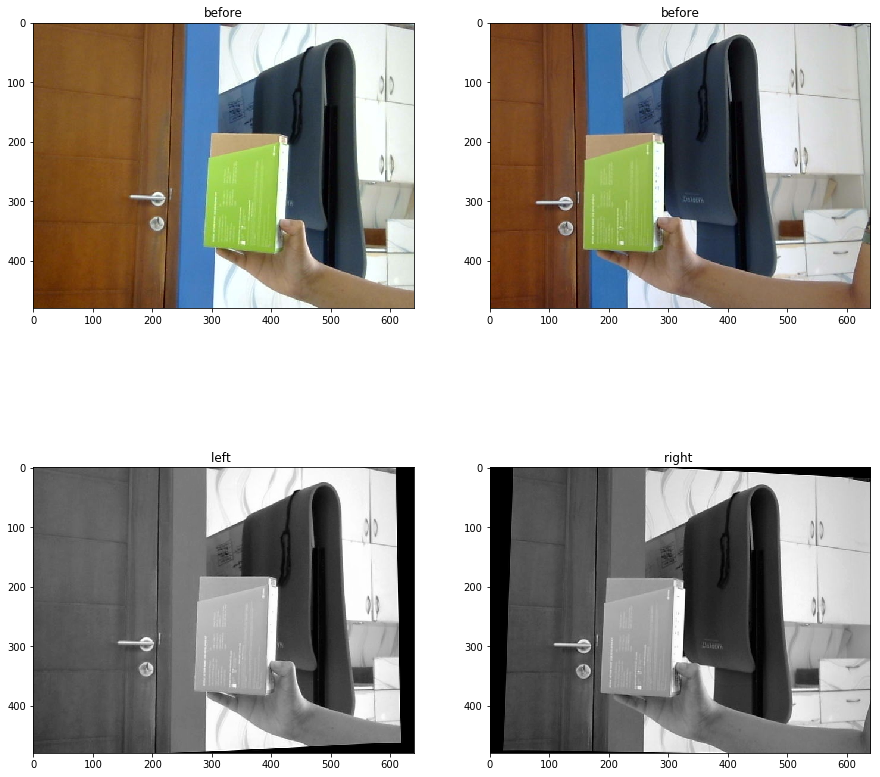

In [39]:
samples_dir = os.path.join('.', 'samples')
# Load image
left_img_path = os.path.join(samples_dir, 'stereo_img_1', 'left.jpg')
right_img_path = os.path.join(samples_dir, 'stereo_img_1', 'right.jpg')

left_img = cv2.imread(left_img_path)
right_img = cv2.imread(right_img_path)

left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

# undistored and rectivy
import calibration
preset_path = os.path.join(os.path.dirname(os.getcwd()), 'calibration_preset')
left_gray, right_gray = calibration.calibrate_imgs(left_gray, right_gray, preset_path)

plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB))
plt.title('before')

plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB))
plt.title('before')

plt.subplot(2,2,3)
plt.imshow(left_gray, 'gray')
plt.title('left ')

plt.subplot(2,2,4)
plt.imshow(right_gray, 'gray')
plt.title('right ')

plt.show()


75.8 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


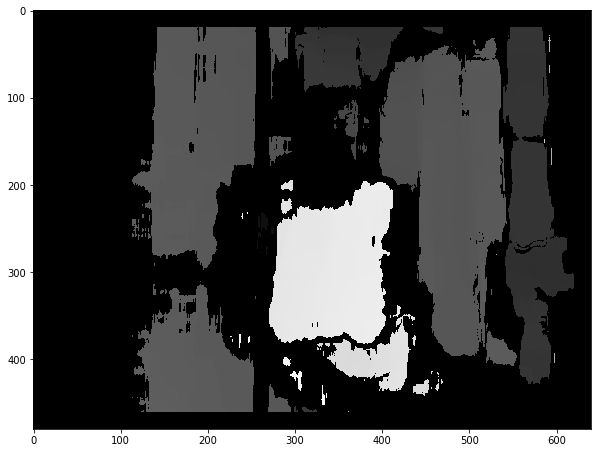

In [41]:
# stereo = cv2.StereoBM_create(numDisparities=64, blockSize=31) # 17 / 3 / 2022
# stereo.setMinDisparity(6)
stereo = cv2.StereoBM_create(numDisparities=96, blockSize=39)
stereo.setMinDisparity(0)
%timeit stereo.compute(left_gray, right_gray)
disparity = stereo.compute(left_gray, right_gray)
disparity = (disparity/16.0 - stereo.getMinDisparity()) / stereo.getNumDisparities()

plt.figure(figsize=(10,10))
plt.imshow(disparity, 'gray')

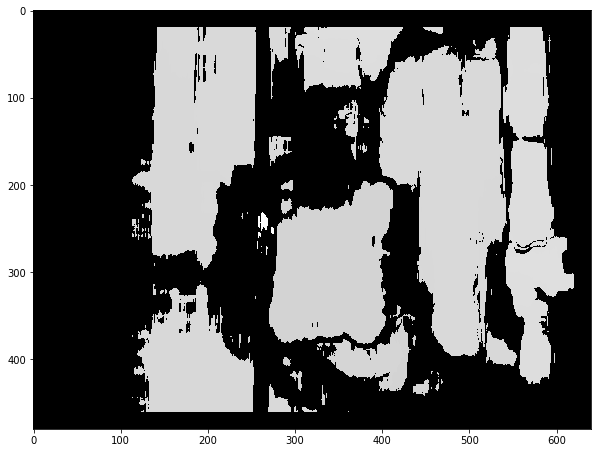

In [46]:
focal = 4.0 # 4 mm
focal = focal / 10 # convert to cm
baseline = 7.3 # in cm

# Z = (B * f) / x1 - x2
M = (focal * baseline)
depth =  np.divide(M, disparity, where=disparity != 0)

# filter inf
depth[depth == float('inf')] = 0

# scale
max_distance = np.max(depth)
min_distance = np.min(depth)
depth = (depth - min_distance) / (max_distance - min_distance)

plt.figure(figsize=(10,10))
plt.imshow(depth, 'gray')
plt.show()

In [44]:
np.unique(depth)

array([ 0.        ,  0.82222222,  0.83087719,  0.83092299,  0.83092874,
        0.8312144 ,  0.83122055,  0.83122671,  0.83123288,  0.83123905,
        0.83124524,  0.83125143,  0.83125763,  0.83126384,  0.83132012,
        0.83134535,  0.83156566,  0.8315723 ,  0.83157895,  0.83158561,
        0.83159228,  0.83159895,  0.83160564,  0.83161234,  0.83161905,
        0.83162576,  0.83163249,  0.83163923,  0.83164597,  0.83165273,
        0.83165949,  0.83166627,  0.83167305,  0.83167985,  0.83168665,
        0.83169346,  0.83170029,  0.83170712,  0.83171397,  0.83172082,
        0.83172768,  0.83173455,  0.83174144,  0.83174833,  0.83175523,
        0.83176215,  0.83176907,  0.831776  ,  0.83178295,  0.8317899 ,
        0.83179686,  0.83180384,  0.83181082,  0.83181781,  0.83182482,
        0.83183183,  0.83183886,  0.83184589,  0.83185294,  0.83185999,
        0.83186706,  0.83187413,  0.83188122,  0.83188832,  0.83189542,
        0.83190254,  0.83190967,  0.83191681,  0.83192396,  0.83